# Book Recommenmdation System

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

In [1]:
#Importinf Libraries
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')


# Data
● Users :
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.
● Books :
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.
● Ratings :
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

# Importing Dataset

In [2]:
#Users data
users = pd.read_csv('Users.csv')
users.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [4]:
#Book data
books = pd.read_csv('Books.csv')
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [5]:
#Rating data
ratings = pd.read_csv('Ratings.csv')
ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [6]:
# Dimension of Dataset


In [7]:
users.shape,ratings.shape,books.shape

((278858, 3), (1149780, 3), (271360, 8))

# 1) Users_dataset

In [8]:
def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [9]:
missing_values(users)

index  Missing Values  % of Total Values Data_type
0       Age          110762              39.72   float64
1   User-ID               0               0.00     int64
2  Location               0               0.00    object

    Age have about 39% of missing values.

In [10]:
#Age distribution

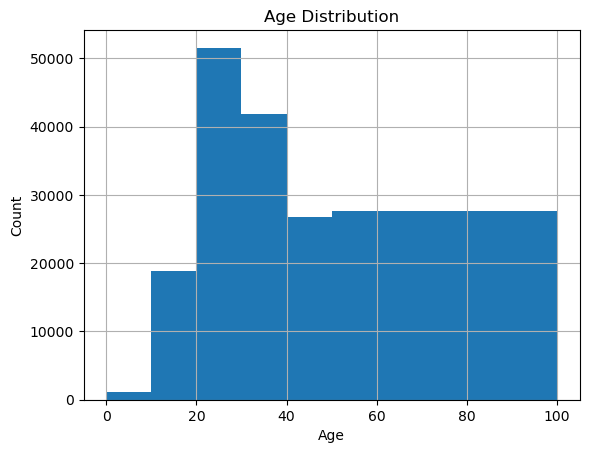

In [11]:
users.Age.hist(bins=[0,10,20,30,40,50,100])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The most active users are ampong those in their 20-40s of age

Text(0.5, 1.0, 'Find outlier data in Age column')

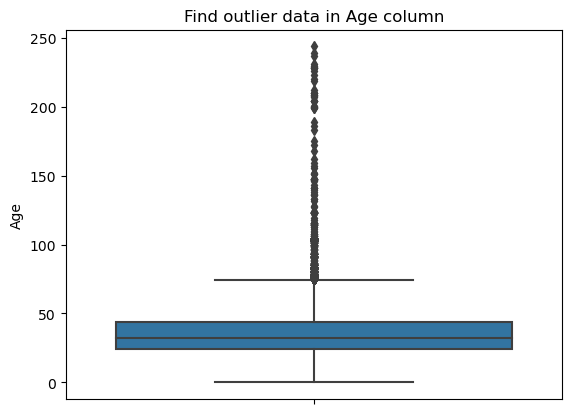

In [12]:
#Outliers detection
sns.boxplot(y = 'Age', data= users)
plt.title('Find outlier data in Age column')

In [13]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Ok we have Outlier data in Age

In [14]:
#lets find our unique value in location column

In [15]:
users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [16]:
users.Location.nunique()

57339

57339 unique values, its really hard to understand 
so lets create column Country

In [17]:
for i in users :
    users['Country'] = users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [18]:
users.Country.nunique()

529

In [19]:
#drop location column
users.drop('Location',axis=1,inplace=True)

In [20]:
users

User-ID   Age         Country
0             1   NaN             usa
1             2  18.0             usa
2             3   NaN          russia
3             4  17.0        portugal
4             5   NaN  united kingdom
...         ...   ...             ...
278853   278854   NaN             usa
278854   278855  50.0  united kingdom
278855   278856   NaN          canada
278856   278857   NaN             usa
278857   278858   NaN         ireland

[278858 rows x 3 columns]

In [21]:
users.isnull().sum()

User-ID         0
Age        110762
Country       368
dtype: int64

In [22]:
users['Country'] = users['Country'].astype('str')

In [23]:
a = list(users.Country.unique())
a =set(a)
a= list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

Some data has Misspellings , Lets correct it.

In [24]:
users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Text(0.5, 1.0, 'Count of users Country wise')

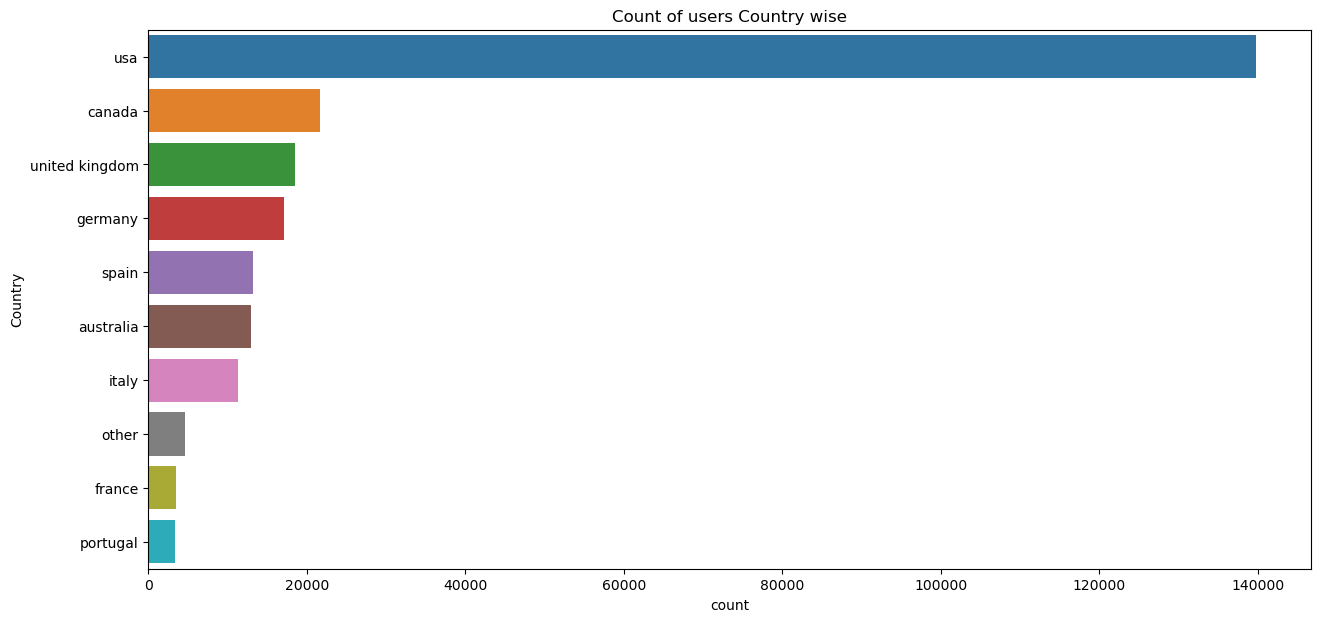

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

Most number of users are from USA

In [26]:
#Lets treat outliers in users age

Text(0.5, 1.0, 'Age Distribution Plot')

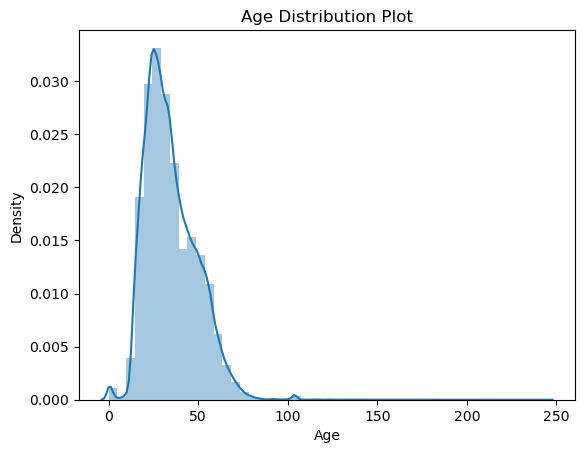

In [27]:
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

Age value's below 5 and above 100 do not make much sense for our book rating case...hence replacing these by NaNs

In [28]:
#Outlier data became NaN
users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

In [29]:
users.isna().sum()

User-ID         0
Age        112010
Country         0
dtype: int64

Age has positive Skewness (right tail) so we can use median to fill Nan values, but for this we don't like to fill Nan value just for one range of age. To handle this we'll use country column to fill Nan.

In [30]:
users['Age'] = users['Age'].fillna(users.groupby('Country')['Age'].transform('median'))

In [31]:
users.isna().sum()

User-ID      0
Age        276
Country      0
dtype: int64

Still we have 276 Nan values let's fill them with mean

In [32]:
users['Age'].fillna(users.Age.mean(), inplace=True)

In [33]:
users.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

# 2)Books_Dataset

In [34]:
books

ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford                2002   
1       Richard Bruce Wright                2001   
2               Carlo D'Este                1991   
3           Gina Bari Kolata                1999   
4            E. J. W. Barber                1999   
...                      ...                 ...   
271355        Paula Danziger                1988   
271356            Teri Sloat                1991   
271357      Christine Wicker                2004   
271358                 Plato                1996   
271359   Christopher  Biffle                2000   

                                               Publisher  \
0                                Oxford University Press   
1                                  HarperFlamingo Canada   
2                                        HarperPerennial   
3                                   Farrar Straus Giroux   
4                             W. W. Norton &amp; Company   
...                                                  ...   
271355                   Random House Childrens Pub (Mm)   
271356                                      Dutton Books   
271357                                HarperSanFrancisco   
271358                           Oxford University Press   
271359  McGraw-Hill Humanities/Social Sciences/Languages   

                                              Image-URL-S  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-M  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-L  
0       http://images.amazon.com/images/P/0195153448.0...  
1       http://images.amazon.com/images/P/0002005018.0...  
2       http://images.amazon.com/images/P/0060973129.0...  
3       http://images.amazon.com/images/P/0374157065.0...  
4       http://images.ama

In [35]:
books.head(2)

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...

In [36]:
#Top 10 Authors which have written the most books.

Text(0.5, 1.0, 'Top 10 Authors')

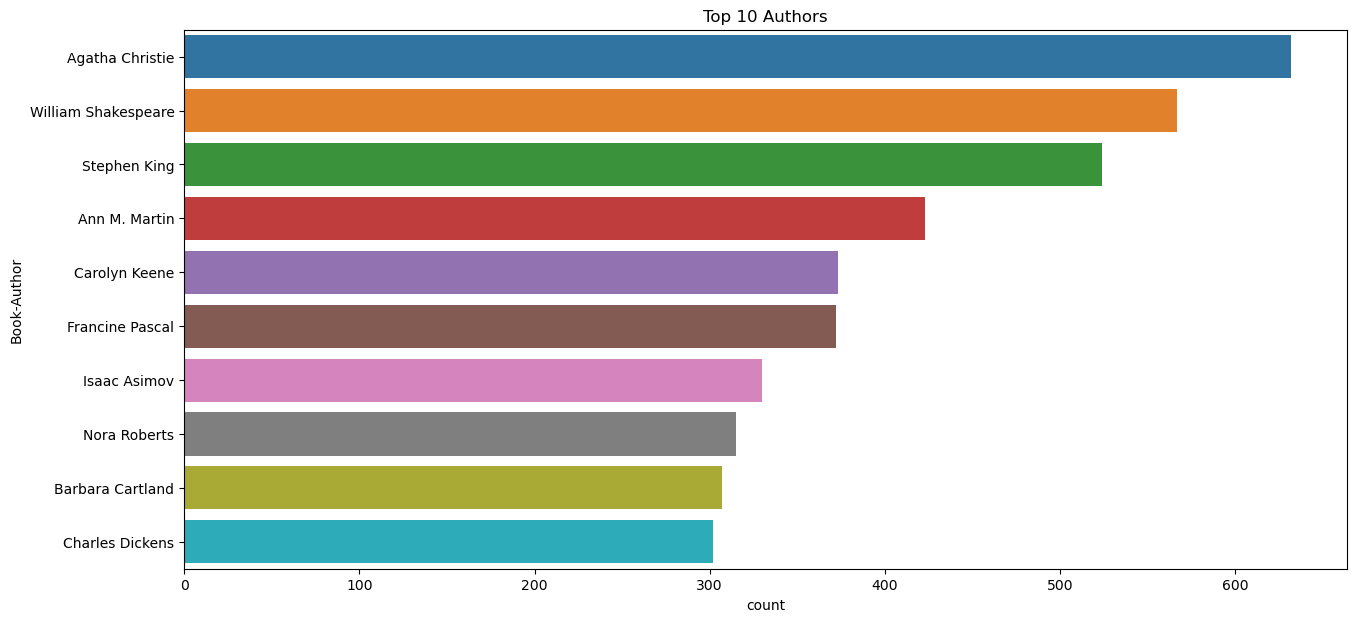

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

In [38]:
#Top 10 Publisher which have published the most books

Text(0.5, 1.0, 'Top 10 Publishers')

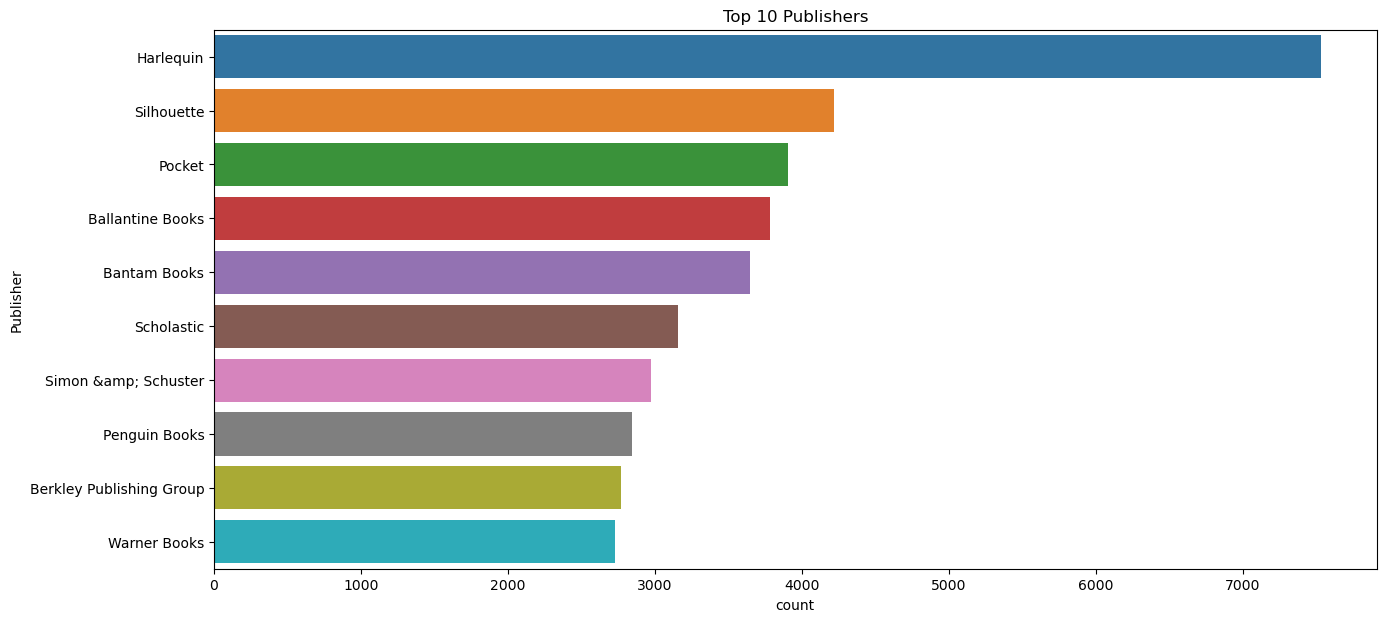

In [39]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

In [40]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype('str')
a=list(books['Year-Of-Publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


In [41]:
#investigating the rows having 'DK Publishing Inc' as year Of Publication
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

ISBN                                         Book-Title  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

       Book-Author Year-Of-Publication  \
209538        2000   DK Publishing Inc   
221678        2000   DK Publishing Inc   

                                                Publisher  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-S  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-M Image-URL-L  
209538  http://images.amazon.com/images/P/078946697X.0...         NaN  
221678  http://images.amazon.com/images/P/0789466953.0...         NaN

As it can be seen from above that there are some incorrect entries in Year-Of-Publication field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset due to some errors in csv file

In [42]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [43]:
#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [44]:
#rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

ISBN                                         Book-Title  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

               Book-Author Year-Of-Publication          Publisher  \
209538  Michael Teitelbaum                2000  DK Publishing Inc   
221678       James Buckley                2000  DK Publishing Inc   

                                              Image-URL-S  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-M Image-URL-L  
209538  http://images.amazon.com/images/P/078946697X.0...         NaN  
221678  http://images.amazon.com/images/P/0789466953.0...         NaN

In [45]:
#investigating the rows having 'Gallimard' as yearOfPublication
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

ISBN                                         Book-Title  \
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   

       Book-Author Year-Of-Publication  \
220731        2003           Gallimard   

                                                Publisher  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-S  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-M Image-URL-L  
220731  http://images.amazon.com/images/P/2070426769.0...         NaN

In [46]:
#making required corrections as above, keeping other fields intact
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books.ISBN == '2070426769',:]

ISBN                             Book-Title  \
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers   

                            Book-Author Year-Of-Publication  Publisher  \
220731  Jean-Marie Gustave Le ClÃ?Â©zio                2003  Gallimard   

                                              Image-URL-S  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-M Image-URL-L  
220731  http://images.amazon.com/images/P/2070426769.0...         NaN

In [47]:
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

print(sorted(books['Year-Of-Publication'].unique()))
#Now it can be seen that yearOfPublication has all values as integers

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


The value 0 for Year-Of_Publication is invalid and as this dataset was published in 2004, We have assumed that the years after 2006 to be invalid and setting invalid years as NaN

Reference of the fact: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [48]:
books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with median value of Year-Of-Publication
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()), inplace=True)

In [49]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [50]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [51]:
#exploring 'publisher' column
books.loc[books.Publisher.isnull(),:]

ISBN       Book-Title      Book-Author  Year-Of-Publication  \
128890  193169656X      Tyrant Moon  Elaine Corvidae               2002.0   
129037  1931696993  Finders Keepers  Linnea Sinclair               2001.0   

       Publisher  
128890       NaN  
129037       NaN

In [52]:
#Filling Nan of Publisher with others
books.Publisher.fillna('other',inplace=True)

In [53]:
#exploring 'Book-Author' column
books.loc[books['Book-Author'].isnull(),:]

ISBN                                         Book-Title  \
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   

       Book-Author  Year-Of-Publication                       Publisher  
187689         NaN               1995.0  Edinburgh Financial Publishing

In [54]:
#Filling Nan of Book-Author with others
books['Book-Author'].fillna('other',inplace=True)

In [55]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

# 3) Ratings Dataset

In [56]:
ratings

User-ID         ISBN  Book-Rating
0         276725   034545104X            0
1         276726   0155061224            5
2         276727   0446520802            0
3         276729   052165615X            3
4         276729   0521795028            6
...          ...          ...          ...
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[1149780 rows x 3 columns]

Ratings dataset should have books only which exist in our books dataset

In [57]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape, ratings_new.shape

((1149780, 3), (1031136, 3))

It can be seen that many rows having book ISBN not part of books dataset got dropped off

Ratings dataset should have ratings from users which exist in users dataset.



In [58]:
print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


It can be seen that no new user was there in ratings dataset.

Let's see how the ratings are distributed

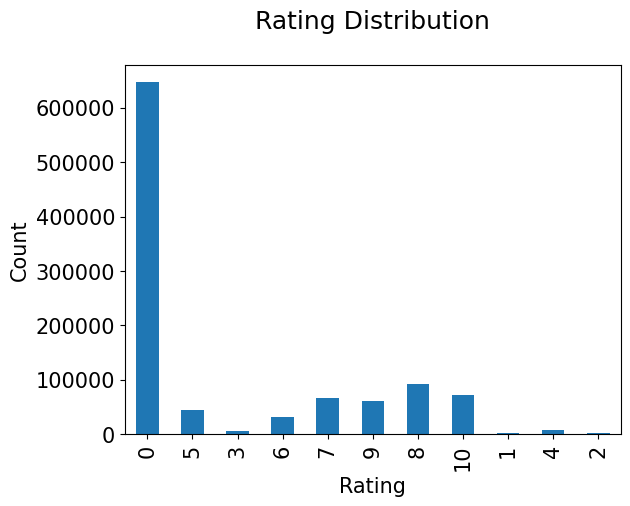

In [59]:
plt.rc("font", size=15)
ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The ratings are very unevenly distributed, and the vast majority of ratings are 0 .As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit and explict ratings datasets

<Axes: xlabel='Book-Rating', ylabel='count'>

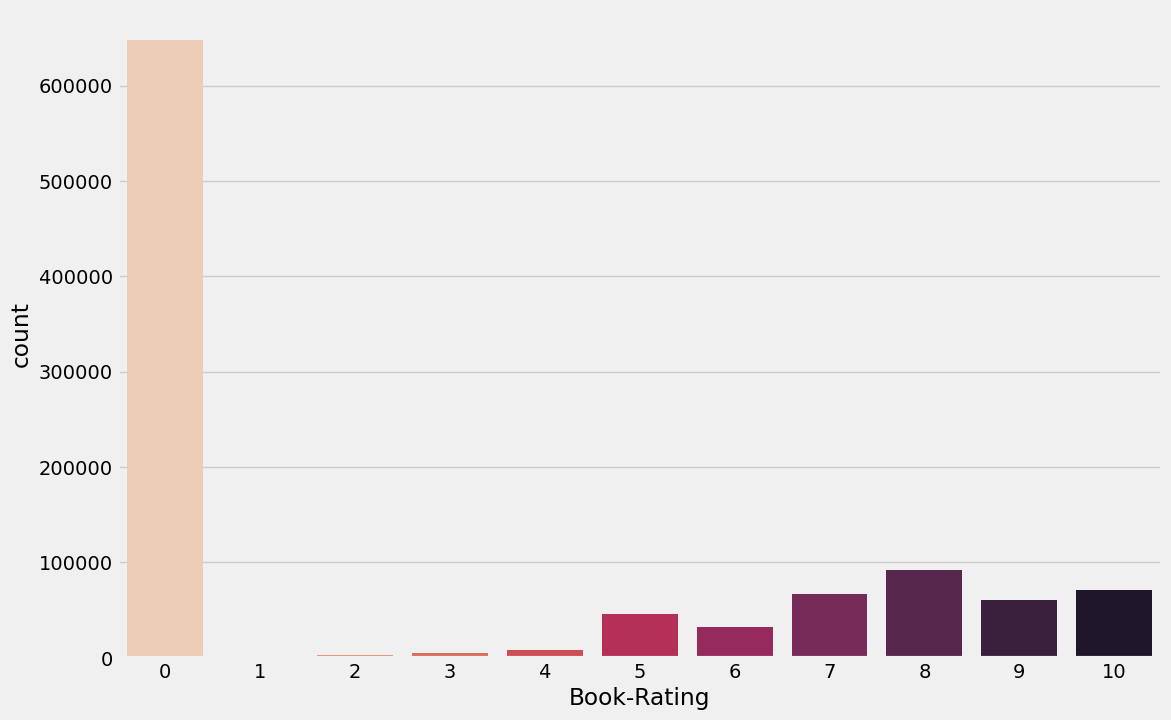

In [60]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data= ratings_new , x='Book-Rating', palette='rocket_r')

It can be observe that higher ratings are more common amongst users and rating 8 has been rated highest number of times

In [61]:
#Let's find the top 5 books which are rated by most number of users.
rating_count = pd.DataFrame(ratings_new.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

Book-Rating
ISBN                   
0971880107         2502
0316666343         1295
0385504209          883
0060928336          732
0312195516          723

The book with ISBN '0316666343' received the most rating counts.

In [62]:
#Let’s find out what book it is, and what books are in the top 5.
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

ISBN                                       Book-Title    Book-Author  \
0  0316666343                        The Lovely Bones: A Novel   Alice Sebold   
1  0971880107                                      Wild Animus   Rich Shapero   
2  0385504209                                The Da Vinci Code      Dan Brown   
3  0312195516              The Red Tent (Bestselling Backlist)  Anita Diamant   
4  0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel  Rebecca Wells   

   Year-Of-Publication      Publisher  
0               2002.0  Little, Brown  
1               2004.0        Too Far  
2               2003.0      Doubleday  
3               1998.0    Picador USA  
4               1997.0      Perennial

The book that received the most rating counts in this data set is Rich Shapero’s “Wild Animus”. And there is something in common among these five books that received the most rating counts — they are all novels. So it is conclusive that novels are popular and likely receive more ratings.

In [63]:
#create column Rating Average
ratings_new ['Avg_Rating'] = ratings_new.groupby('ISBN')['Book-Rating'].transform('mean')

In [64]:
#Cearting column Rating sum
ratings_new['Total_No_Of_Users_Rated']=ratings_new.groupby('ISBN')['Book-Rating'].transform('count')

In [65]:
ratings_new

User-ID        ISBN  Book-Rating  Avg_Rating  Total_No_Of_Users_Rated
0         276725  034545104X            0    2.933333                       60
1         276726  0155061224            5    2.500000                        2
2         276727  0446520802            0    4.060345                      116
3         276729  052165615X            3    3.000000                        1
4         276729  0521795028            6    6.000000                        1
...          ...         ...          ...         ...                      ...
1149774   276704  0876044011            0    0.000000                        3
1149775   276704  1563526298            9    7.000000                        3
1149776   276706  0679447156            0    2.925000                       40
1149777   276709  0515107662           10    3.454545                       44
1149778   276721  0590442449           10    1.200000                       15

[1031136 rows x 5 columns]

# Merging All Dataset

In [66]:
rating_with_name = ratings_new.merge(books, on= 'ISBN')

In [67]:
rating_with_name

User-ID        ISBN  Book-Rating  Avg_Rating  \
0         276725  034545104X            0    2.933333   
1           2313  034545104X            5    2.933333   
2           6543  034545104X            0    2.933333   
3           8680  034545104X            5    2.933333   
4          10314  034545104X            9    2.933333   
...          ...         ...          ...         ...   
1031131   276688  0517145553            0    0.000000   
1031132   276688  1575660792            7    7.000000   
1031133   276690  0590907301            0    0.000000   
1031134   276704  0679752714            0    0.000000   
1031135   276704  0806917695            5    5.000000   

         Total_No_Of_Users_Rated  \
0                             60   
1                             60   
2                             60   
3                             60   
4                             60   
...                          ...   
1031131                        1   
1031132                        1   
1031133                        1   
1031134                        1   
1031135                        1   

                                                Book-Title      Book-Author  \
0                                     Flesh Tones: A Novel       M. J. Rose   
1                                     Flesh Tones: A Novel       M. J. Rose   
2                                     Flesh Tones: A Novel       M. J. Rose   
3                                     Flesh Tones: A Novel       M. J. Rose   
4                                     Flesh Tones: A Novel       M. J. Rose   
...                                                    ...              ...   
1031131                                    Mostly Harmless    Douglas Adams   
1031132                                        Gray Matter  Shirley Kennett   
1031133  Triplet Trouble and the Class Trip (Triplet Tr...     Debbie Dadey   
1031134  A Desert of Pure Feeling (Vintage Contemporaries)   Judith Freeman   
1031135  Perplexing Lateral Thinking Puzzles: Scholasti...      Paul Sloane   

         Year-Of-Publication                          Publisher  
0                     2002.0                   Ballantine Books  
1                     2002.0                   Ballantine Books  
2                     2002.0                   Ballantine Books  
3                     2002.0                   Ballantine Books  
4                     2002.0                   Ballantine Books  
...                      ...                                ...  
1031131               1995.0             Random House Value Pub  
1031132               1996.0  Kensington Publishing Corporation  
1031133               1997.0                              Apple  
1031134               1997.0                  Vintage Books USA  
1031135               1997.0                Sterling Publishing  

[1031136 rows x 9 columns]

In [68]:
x = rating_with_name.groupby('User-ID').count()['Book-Rating'] >50
y = x[x].index

In [69]:
x

User-ID
2         False
8         False
9         False
10        False
12        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book-Rating, Length: 92106, dtype: bool

In [70]:
y

Int64Index([   243,    254,    507,    638,    643,    741,    882,    929,
              1211,   1424,
            ...
            277928, 277965, 278026, 278137, 278144, 278188, 278418, 278582,
            278633, 278843],
           dtype='int64', name='User-ID', length=3012)

In [71]:
filtered_rating = rating_with_name[rating_with_name['User-ID'].isin(y)]

In [72]:
filtered_rating

User-ID        ISBN  Book-Rating  Avg_Rating  \
2           6543  034545104X            0    2.933333   
4          10314  034545104X            9    2.933333   
5          23768  034545104X            0    2.933333   
7          28523  034545104X            0    2.933333   
10         56157  034545104X            0    2.933333   
...          ...         ...          ...         ...   
1031128   276688  0385471092            0    0.000000   
1031129   276688  0425150526            0    0.000000   
1031130   276688  0449907422            0    0.000000   
1031131   276688  0517145553            0    0.000000   
1031132   276688  1575660792            7    7.000000   

         Total_No_Of_Users_Rated                          Book-Title  \
2                             60                Flesh Tones: A Novel   
4                             60                Flesh Tones: A Novel   
5                             60                Flesh Tones: A Novel   
7                             60                Flesh Tones: A Novel   
10                            60                Flesh Tones: A Novel   
...                          ...                                 ...   
1031128                        1  Mrs. Pollifax and the Second Thief   
1031129                        1            Death Crosses the Border   
1031130                        1  Jazz Funeral: A Skip Langdon Novel   
1031131                        1                     Mostly Harmless   
1031132                        1                         Gray Matter   

              Book-Author  Year-Of-Publication  \
2              M. J. Rose               2002.0   
4              M. J. Rose               2002.0   
5              M. J. Rose               2002.0   
7              M. J. Rose               2002.0   
10             M. J. Rose               2002.0   
...                   ...                  ...   
1031128    Dorothy Gilman               1993.0   
1031129  Janice Steinberg               1995.0   
1031130       Julie Smith               1993.0   
1031131     Douglas Adams               1995.0   
1031132   Shirley Kennett               1996.0   

                                 Publisher  
2                         Ballantine Books  
4                         Ballantine Books  
5                         Ballantine Books  
7                         Ballantine Books  
10                        Ballantine Books  
...                                    ...  
1031128                    Doubleday Books  
1031129           Berkley Publishing Group  
1031130                   Ballantine Books  
1031131             Random House Value Pub  
1031132  Kensington Publishing Corporation  

[687966 rows x 9 columns]

In [73]:
y1 = filtered_rating.groupby('Book-Title').count()['Book-Rating']>= 10
famous_books = y1[y1].index

In [74]:
famous_books

Index([' Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback))',
       ' Q-Space (Star Trek The Next Generation, Book 47)', ''Salem's Lot',
       '01-01-00: The Novel of the Millennium',
       '1,000 Places to See Before You Die', '10 Lb. Penalty',
       '1001 Ways to Be Romantic', '101 Dalmatians',
       '101 Hopelessly Hilarious Jokes', '101 Silly Summertime Jokes',
       ...
       'Zombies of the Gene Pool', 'Zoya',
       'Zoya's Story: An Afghan Woman's Struggle for Freedom',
       '\ Lamb to the Slaughter and Other Stories (Penguin 60s S.)"',
       '\A\" is for Alibi : A Kinsey Millhone Mystery (A Kinsey Millhone Mystery)"',
       '\O\" Is for Outlaw"',
       '\Surely You're Joking, Mr. Feynman!\": Adventures of a Curious Character"',
       'e', 'one hundred years of solitude', 'stardust'],
      dtype='object', name='Book-Title', length=11648)

In [75]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books) ]
final_ratings

User-ID        ISBN  Book-Rating  Avg_Rating  \
2           6543  034545104X            0    2.933333   
4          10314  034545104X            9    2.933333   
5          23768  034545104X            0    2.933333   
7          28523  034545104X            0    2.933333   
10         56157  034545104X            0    2.933333   
...          ...         ...          ...         ...   
1031125   276688  0060164220            0    0.000000   
1031126   276688  0060168307            0    0.000000   
1031128   276688  0385471092            0    0.000000   
1031131   276688  0517145553            0    0.000000   
1031132   276688  1575660792            7    7.000000   

         Total_No_Of_Users_Rated                          Book-Title  \
2                             60                Flesh Tones: A Novel   
4                             60                Flesh Tones: A Novel   
5                             60                Flesh Tones: A Novel   
7                             60                Flesh Tones: A Novel   
10                            60                Flesh Tones: A Novel   
...                          ...                                 ...   
1031125                        1                        Coyote Waits   
1031126                        1                       Sacred Clowns   
1031128                        1  Mrs. Pollifax and the Second Thief   
1031131                        1                     Mostly Harmless   
1031132                        1                         Gray Matter   

             Book-Author  Year-Of-Publication  \
2             M. J. Rose               2002.0   
4             M. J. Rose               2002.0   
5             M. J. Rose               2002.0   
7             M. J. Rose               2002.0   
10            M. J. Rose               2002.0   
...                  ...                  ...   
1031125   Tony Hillerman               1990.0   
1031126   Tony Hillerman               1994.0   
1031128   Dorothy Gilman               1993.0   
1031131    Douglas Adams               1995.0   
1031132  Shirley Kennett               1996.0   

                                 Publisher  
2                         Ballantine Books  
4                         Ballantine Books  
5                         Ballantine Books  
7                         Ballantine Books  
10                        Ballantine Books  
...                                    ...  
1031125                      Harpercollins  
1031126                      Harpercollins  
1031128                    Doubleday Books  
1031131             Random House Value Pub  
1031132  Kensington Publishing Corporation  

[325758 rows x 9 columns]

In [76]:
final_ratings.drop_duplicates()

User-ID        ISBN  Book-Rating  Avg_Rating  \
2           6543  034545104X            0    2.933333   
4          10314  034545104X            9    2.933333   
5          23768  034545104X            0    2.933333   
7          28523  034545104X            0    2.933333   
10         56157  034545104X            0    2.933333   
...          ...         ...          ...         ...   
1031125   276688  0060164220            0    0.000000   
1031126   276688  0060168307            0    0.000000   
1031128   276688  0385471092            0    0.000000   
1031131   276688  0517145553            0    0.000000   
1031132   276688  1575660792            7    7.000000   

         Total_No_Of_Users_Rated                          Book-Title  \
2                             60                Flesh Tones: A Novel   
4                             60                Flesh Tones: A Novel   
5                             60                Flesh Tones: A Novel   
7                             60                Flesh Tones: A Novel   
10                            60                Flesh Tones: A Novel   
...                          ...                                 ...   
1031125                        1                        Coyote Waits   
1031126                        1                       Sacred Clowns   
1031128                        1  Mrs. Pollifax and the Second Thief   
1031131                        1                     Mostly Harmless   
1031132                        1                         Gray Matter   

             Book-Author  Year-Of-Publication  \
2             M. J. Rose               2002.0   
4             M. J. Rose               2002.0   
5             M. J. Rose               2002.0   
7             M. J. Rose               2002.0   
10            M. J. Rose               2002.0   
...                  ...                  ...   
1031125   Tony Hillerman               1990.0   
1031126   Tony Hillerman               1994.0   
1031128   Dorothy Gilman               1993.0   
1031131    Douglas Adams               1995.0   
1031132  Shirley Kennett               1996.0   

                                 Publisher  
2                         Ballantine Books  
4                         Ballantine Books  
5                         Ballantine Books  
7                         Ballantine Books  
10                        Ballantine Books  
...                                    ...  
1031125                      Harpercollins  
1031126                      Harpercollins  
1031128                    Doubleday Books  
1031131             Random House Value Pub  
1031132  Kensington Publishing Corporation  

[325758 rows x 9 columns]

In [77]:
final_ratings['User-ID'].nunique()

3005

In [78]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [79]:
pt

User-ID                                             243     254     507     \
Book-Title                                                                   
 Murder of a Sleeping Beauty (Scumble River Mys...     NaN     NaN     NaN   
 Q-Space (Star Trek The Next Generation, Book 47)      NaN     NaN     NaN   
'Salem's Lot                                           NaN     NaN     NaN   
01-01-00: The Novel of the Millennium                  NaN     NaN     NaN   
1,000 Places to See Before You Die                     NaN     NaN     NaN   
...                                                    ...     ...     ...   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   
\Surely You're Joking, Mr. Feynman!\": Adventur...     NaN     NaN     NaN   
e                                                      NaN     NaN     NaN   
one hundred years of solitude                          NaN     NaN     NaN   
stardust                                               NaN     0.0     NaN   

User-ID                                             638     643     741     \
Book-Title                                                                   
 Murder of a Sleeping Beauty (Scumble River Mys...     NaN     NaN     NaN   
 Q-Space (Star Trek The Next Generation, Book 47)      NaN     NaN     NaN   
'Salem's Lot                                           NaN     NaN     NaN   
01-01-00: The Novel of the Millennium                  NaN     NaN     NaN   
1,000 Places to See Before You Die                     NaN     NaN     NaN   
...                                                    ...     ...     ...   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   
\Surely You're Joking, Mr. Feynman!\": Adventur...     NaN     NaN     NaN   
e                                                      NaN     NaN     NaN   
one hundred years of solitude                          NaN     NaN     NaN   
stardust                                               NaN     NaN     NaN   

User-ID                                             882     929     1211    \
Book-Title                                                                   
 Murder of a Sleeping Beauty (Scumble River Mys...     NaN     NaN     NaN   
 Q-Space (Star Trek The Next Generation, Book 47)      NaN     NaN     NaN   
'Salem's Lot                                           NaN     NaN     NaN   
01-01-00: The Novel of the Millennium                  NaN     NaN     NaN   
1,000 Places to See Before You Die                     NaN     NaN     NaN   
...                                                    ...     ...     ...   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   
\Surely You're Joking, Mr. Feynman!\": Adventur...     NaN     NaN     NaN   
e                                                      NaN     NaN     NaN   
one hundred years of solitude                          NaN     NaN     NaN   
stardust                                               NaN     NaN     NaN   

User-ID                                             1424    ...  277928  \
Book-Title                                                  ...           
 Murder of a Sleeping Beauty (Scumble River Mys...     NaN  ...     NaN   
 Q-Space (Star Trek The Next Generation, Book 47)      NaN  ...     NaN   
'Salem's Lot                                           NaN  ...     NaN   
01-01-00: The Novel of the Millennium                  NaN  ...     NaN   
1,000 Places to See Before You Die                     NaN  ...     NaN   
...                                                    ...  ...     ...   
\O\" Is for Outlaw"                                    NaN  ...     NaN   
\Surely You're Joking, Mr. Feynman!\": Adventur...     NaN  ...     NaN   
e                                                      NaN  ...     NaN   
one hundred years of solitude                          NaN  ...     NaN   
stardust                                               

In [80]:
pt.fillna(0,inplace=True)

In [81]:
pt

User-ID                                             243     254     507     \
Book-Title                                                                   
 Murder of a Sleeping Beauty (Scumble River Mys...     0.0     0.0     0.0   
 Q-Space (Star Trek The Next Generation, Book 47)      0.0     0.0     0.0   
'Salem's Lot                                           0.0     0.0     0.0   
01-01-00: The Novel of the Millennium                  0.0     0.0     0.0   
1,000 Places to See Before You Die                     0.0     0.0     0.0   
...                                                    ...     ...     ...   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   
\Surely You're Joking, Mr. Feynman!\": Adventur...     0.0     0.0     0.0   
e                                                      0.0     0.0     0.0   
one hundred years of solitude                          0.0     0.0     0.0   
stardust                                               0.0     0.0     0.0   

User-ID                                             638     643     741     \
Book-Title                                                                   
 Murder of a Sleeping Beauty (Scumble River Mys...     0.0     0.0     0.0   
 Q-Space (Star Trek The Next Generation, Book 47)      0.0     0.0     0.0   
'Salem's Lot                                           0.0     0.0     0.0   
01-01-00: The Novel of the Millennium                  0.0     0.0     0.0   
1,000 Places to See Before You Die                     0.0     0.0     0.0   
...                                                    ...     ...     ...   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   
\Surely You're Joking, Mr. Feynman!\": Adventur...     0.0     0.0     0.0   
e                                                      0.0     0.0     0.0   
one hundred years of solitude                          0.0     0.0     0.0   
stardust                                               0.0     0.0     0.0   

User-ID                                             882     929     1211    \
Book-Title                                                                   
 Murder of a Sleeping Beauty (Scumble River Mys...     0.0     0.0     0.0   
 Q-Space (Star Trek The Next Generation, Book 47)      0.0     0.0     0.0   
'Salem's Lot                                           0.0     0.0     0.0   
01-01-00: The Novel of the Millennium                  0.0     0.0     0.0   
1,000 Places to See Before You Die                     0.0     0.0     0.0   
...                                                    ...     ...     ...   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   
\Surely You're Joking, Mr. Feynman!\": Adventur...     0.0     0.0     0.0   
e                                                      0.0     0.0     0.0   
one hundred years of solitude                          0.0     0.0     0.0   
stardust                                               0.0     0.0     0.0   

User-ID                                             1424    ...  277928  \
Book-Title                                                  ...           
 Murder of a Sleeping Beauty (Scumble River Mys...     0.0  ...     0.0   
 Q-Space (Star Trek The Next Generation, Book 47)      0.0  ...     0.0   
'Salem's Lot                                           0.0  ...     0.0   
01-01-00: The Novel of the Millennium                  0.0  ...     0.0   
1,000 Places to See Before You Die                     0.0  ...     0.0   
...                                                    ...  ...     ...   
\O\" Is for Outlaw"                                    0.0  ...     0.0   
\Surely You're Joking, Mr. Feynman!\": Adventur...     0.0  ...     0.0   
e                                                      0.0  ...     0.0   
one hundred years of solitude                          0.0  ...     0.0   
stardust                                               

In [82]:
#Calculate the distances and similarity

In [83]:
from sklearn.metrics import pairwise_distances

In [84]:
pd.DataFrame(pairwise_distances(pt, metric='cosine'))

0             1      2         3      4         5      6         7      \
0        0.0  1.000000e+00    1.0  1.000000    1.0  1.000000    1.0  1.000000   
1        1.0  2.220446e-16    1.0  1.000000    1.0  1.000000    1.0  1.000000   
2        1.0  1.000000e+00    0.0  1.000000    1.0  1.000000    1.0  1.000000   
3        1.0  1.000000e+00    1.0  0.000000    1.0  1.000000    1.0  1.000000   
4        1.0  1.000000e+00    1.0  1.000000    0.0  1.000000    1.0  1.000000   
...      ...           ...    ...       ...    ...       ...    ...       ...   
11643    1.0  1.000000e+00    1.0  0.977151    1.0  0.963632    1.0  0.878875   
11644    1.0  1.000000e+00    1.0  0.919654    1.0  1.000000    1.0  1.000000   
11645    1.0  1.000000e+00    1.0  1.000000    1.0  1.000000    1.0  1.000000   
11646    1.0  1.000000e+00    1.0  1.000000    1.0  1.000000    1.0  1.000000   
11647    1.0  1.000000e+00    1.0  0.906540    1.0  1.000000    1.0  1.000000   

       8      9      ...  11638     11639  11640  11641    11642     11643  \
0        1.0    1.0  ...    1.0  1.000000    1.0    1.0  1.00000  1.000000   
1        1.0    1.0  ...    1.0  1.000000    1.0    1.0  1.00000  1.000000   
2        1.0    1.0  ...    1.0  1.000000    1.0    1.0  1.00000  1.000000   
3        1.0    1.0  ...    1.0  0.810222    1.0    1.0  1.00000  0.977151   
4        1.0    1.0  ...    1.0  1.000000    1.0    1.0  1.00000  1.000000   
...      ...    ...  ...    ...       ...    ...    ...      ...       ...   
11643    1.0    1.0  ...    1.0  0.933725    1.0    1.0  0.80967  0.000000   
11644    1.0    1.0  ...    1.0  0.940832    1.0    1.0  1.00000  0.984396   
11645    1.0    1.0  ...    1.0  1.000000    1.0    1.0  1.00000  1.000000   
11646    1.0    1.0  ...    1.0  1.000000    1.0    1.0  1.00000  1.000000   
11647    1.0    1.0  ...    1.0  0.931174    1.0    1.0  1.00000  0.981849   

          11644  11645     11646     11647  
0      1.000000    1.0  1.000000  1.000000  
1      1.000000    1.0  1.000000  1.000000  
2      1.000000    1.0  1.000000  1.000000  
3      0.919654    1.0  1.000000  0.906540  
4      1.000000    1.0  1.000000  1.000000  
...         ...    ...       ...       ...  
11643  0.984396    1.0  1.000000  0.981849  
11644  0.000000    1.0  1.000000  0.863227  
11645  1.000000    0.0  1.000000  1.000000  
11646  1.000000    1.0  0.000000  0.823313  
11647  0.863227    1.0  0.823313  0.000000  

[11648 rows x 11648 columns]

In [85]:
final_ratings.head(3)

User-ID        ISBN  Book-Rating  Avg_Rating  Total_No_Of_Users_Rated  \
2     6543  034545104X            0    2.933333                       60   
4    10314  034545104X            9    2.933333                       60   
5    23768  034545104X            0    2.933333                       60   

             Book-Title Book-Author  Year-Of-Publication         Publisher  
2  Flesh Tones: A Novel  M. J. Rose               2002.0  Ballantine Books  
4  Flesh Tones: A Novel  M. J. Rose               2002.0  Ballantine Books  
5  Flesh Tones: A Novel  M. J. Rose               2002.0  Ballantine Books

In [86]:
sim = 1- pairwise_distances(pt, metric='cosine')
pd.DataFrame(sim)

0      1      2         3      4         5      6         7      8      \
0        1.0    0.0    0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
1        0.0    1.0    0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
2        0.0    0.0    1.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
3        0.0    0.0    0.0  1.000000    0.0  0.000000    0.0  0.000000    0.0   
4        0.0    0.0    0.0  0.000000    1.0  0.000000    0.0  0.000000    0.0   
...      ...    ...    ...       ...    ...       ...    ...       ...    ...   
11643    0.0    0.0    0.0  0.022849    0.0  0.036368    0.0  0.121125    0.0   
11644    0.0    0.0    0.0  0.080346    0.0  0.000000    0.0  0.000000    0.0   
11645    0.0    0.0    0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
11646    0.0    0.0    0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
11647    0.0    0.0    0.0  0.093460    0.0  0.000000    0.0  0.000000    0.0   

       9      ...  11638     11639  11640  11641    11642     11643     11644  \
0        0.0  ...    0.0  0.000000    0.0    0.0  0.00000  0.000000  0.000000   
1        0.0  ...    0.0  0.000000    0.0    0.0  0.00000  0.000000  0.000000   
2        0.0  ...    0.0  0.000000    0.0    0.0  0.00000  0.000000  0.000000   
3        0.0  ...    0.0  0.189778    0.0    0.0  0.00000  0.022849  0.080346   
4        0.0  ...    0.0  0.000000    0.0    0.0  0.00000  0.000000  0.000000   
...      ...  ...    ...       ...    ...    ...      ...       ...       ...   
11643    0.0  ...    0.0  0.066275    0.0    0.0  0.19033  1.000000  0.015604   
11644    0.0  ...    0.0  0.059168    0.0    0.0  0.00000  0.015604  1.000000   
11645    0.0  ...    0.0  0.000000    0.0    0.0  0.00000  0.000000  0.000000   
11646    0.0  ...    0.0  0.000000    0.0    0.0  0.00000  0.000000  0.000000   
11647    0.0  ...    0.0  0.068826    0.0    0.0  0.00000  0.018151  0.136773   

       11645     11646     11647  
0        0.0  0.000000  0.000000  
1        0.0  0.000000  0.000000  
2        0.0  0.000000  0.000000  
3        0.0  0.000000  0.093460  
4        0.0  0.000000  0.000000  
...      ...       ...       ...  
11643    0.0  0.000000  0.018151  
11644    0.0  0.000000  0.136773  
11645    1.0  0.000000  0.000000  
11646    0.0  1.000000  0.176687  
11647    0.0  0.176687  1.000000  

[11648 rows x 11648 columns]

In [87]:
np.fill_diagonal(sim,0)

In [88]:
similarity = pd.DataFrame(sim)
similarity

0      1      2         3      4         5      6         7      8      \
0        0.0    0.0    0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
1        0.0    0.0    0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
2        0.0    0.0    0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
3        0.0    0.0    0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
4        0.0    0.0    0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
...      ...    ...    ...       ...    ...       ...    ...       ...    ...   
11643    0.0    0.0    0.0  0.022849    0.0  0.036368    0.0  0.121125    0.0   
11644    0.0    0.0    0.0  0.080346    0.0  0.000000    0.0  0.000000    0.0   
11645    0.0    0.0    0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
11646    0.0    0.0    0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
11647    0.0    0.0    0.0  0.093460    0.0  0.000000    0.0  0.000000    0.0   

       9      ...  11638     11639  11640  11641    11642     11643     11644  \
0        0.0  ...    0.0  0.000000    0.0    0.0  0.00000  0.000000  0.000000   
1        0.0  ...    0.0  0.000000    0.0    0.0  0.00000  0.000000  0.000000   
2        0.0  ...    0.0  0.000000    0.0    0.0  0.00000  0.000000  0.000000   
3        0.0  ...    0.0  0.189778    0.0    0.0  0.00000  0.022849  0.080346   
4        0.0  ...    0.0  0.000000    0.0    0.0  0.00000  0.000000  0.000000   
...      ...  ...    ...       ...    ...    ...      ...       ...       ...   
11643    0.0  ...    0.0  0.066275    0.0    0.0  0.19033  0.000000  0.015604   
11644    0.0  ...    0.0  0.059168    0.0    0.0  0.00000  0.015604  0.000000   
11645    0.0  ...    0.0  0.000000    0.0    0.0  0.00000  0.000000  0.000000   
11646    0.0  ...    0.0  0.000000    0.0    0.0  0.00000  0.000000  0.000000   
11647    0.0  ...    0.0  0.068826    0.0    0.0  0.00000  0.018151  0.136773   

       11645     11646     11647  
0        0.0  0.000000  0.000000  
1        0.0  0.000000  0.000000  
2        0.0  0.000000  0.000000  
3        0.0  0.000000  0.093460  
4        0.0  0.000000  0.000000  
...      ...       ...       ...  
11643    0.0  0.000000  0.018151  
11644    0.0  0.000000  0.136773  
11645    0.0  0.000000  0.000000  
11646    0.0  0.000000  0.176687  
11647    0.0  0.176687  0.000000  

[11648 rows x 11648 columns]

In [89]:
pd.set_option('display.max_columns', None)

In [90]:
similarity

0      1      2         3      4         5      6         7      8      \
0        0.0    0.0    0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
1        0.0    0.0    0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
2        0.0    0.0    0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
3        0.0    0.0    0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
4        0.0    0.0    0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
...      ...    ...    ...       ...    ...       ...    ...       ...    ...   
11643    0.0    0.0    0.0  0.022849    0.0  0.036368    0.0  0.121125    0.0   
11644    0.0    0.0    0.0  0.080346    0.0  0.000000    0.0  0.000000    0.0   
11645    0.0    0.0    0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
11646    0.0    0.0    0.0  0.000000    0.0  0.000000    0.0  0.000000    0.0   
11647    0.0    0.0    0.0  0.093460    0.0  0.000000    0.0  0.000000    0.0   

       9         10        11     12     13        14     15        16     \
0        0.0  0.000000  0.197725    0.0    0.0  0.000000    0.0  0.021299   
1        0.0  0.000000  0.000000    0.0    0.0  0.000000    0.0  0.000000   
2        0.0  0.000000  0.000000    0.0    0.0  0.035673    0.0  0.055353   
3        0.0  0.093036  0.000000    0.0    0.0  0.016707    0.0  0.041998   
4        0.0  0.000000  0.000000    0.0    0.0  0.000000    0.0  0.000000   
...      ...       ...       ...    ...    ...       ...    ...       ...   
11643    0.0  0.018069  0.050079    0.0    0.0  0.021045    0.0  0.094901   
11644    0.0  0.063538  0.000000    0.0    0.0  0.011410    0.0  0.028682   
11645    0.0  0.000000  0.000000    0.0    0.0  0.041993    0.0  0.031277   
11646    0.0  0.000000  0.000000    0.0    0.0  0.000000    0.0  0.000000   
11647    0.0  0.073909  0.000000    0.0    0.0  0.063044    0.0  0.047265   

       17     18     19        20     21        22       23     24     \
0        0.0    0.0    0.0  0.000000    0.0  0.153571  0.00000    0.0   
1        0.0    0.0    0.0  0.000000    0.0  0.000000  0.00000    0.0   
2        0.0    0.0    0.0  0.166619    0.0  0.000000  0.12326    0.0   
3        0.0    0.0    0.0  0.000000    0.0  0.000000  0.00000    0.0   
4        0.0    0.0    0.0  0.000000    0.0  0.000000  0.00000    0.0   
...      ...    ...    ...       ...    ...       ...      ...    ...   
11643    0.0    0.0    0.0  0.000000    0.0  0.000000  0.00000    0.0   
11644    0.0    0.0    0.0  0.000000    0.0  0.000000  0.00000    0.0   
11645    0.0    0.0    0.0  0.044770    0.0  0.000000  0.00000    0.0   
11646    0.0    0.0    0.0  0.000000    0.0  0.000000  0.00000    0.0   
11647    0.0    0.0    0.0  0.000000    0.0  0.000000  0.00000    0.0   

          25        26        27        28        29        30        31     \
0      0.000000  0.313375  0.000000  0.078661  0.000000  0.199388  0.000000   
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2      0.000000  0.000000  0.000000  0.040561  0.102255  0.000000  0.000000   
3      0.049866  0.000000  0.140507  0.039893  0.000000  0.000000  0.342997   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
11643  0.009685  0.000000  0.027289  0.061171  0.000000  0.000000  0.066615   
11644  0.034055  0.000000  0.095958  0.027244  0.000000  0.000000  0.234246   
11645  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11646  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11647  0.039614  0.000000  0.255132  0.075531  0.000000  0.000000  0.272481   

          32        33        34     35     36     37     38     39     \
0      0.000000  0.189026  0.000000    0.0    0.0    0.0    0.0    0.0   
1      0.000000  0.000000  0.000000    0.0    0.0    0.0    0.0    0.0   
2      0.000000  0.000000  0.000000    0.0    0.0    0.0    0

In [91]:
similarity.index = final_ratings['Book-Title'].unique()
similarity.columns = final_ratings['Book-Title'].unique()

In [92]:
#Find out similar users

In [93]:
similarity.idxmax()

Flesh Tones: A Novel                                                                                                      Never After
The Notebook                                                                                                              The Natural
A Painted House                                                                                                         Sacred Ground
Lightning                                                                                                          Drop Dead Gorgeous
Manhattan Hunt Club                                                                                                         TEMPTRESS
                                                                                                          ...                        
MAGIC                                                                                Striking the Balance (Worldwar Series, Volume 4)
The Magic School Bus in the Time of the Dinosaurs (Magic Schoo

In [94]:
final_ratings[(final_ratings['User-ID'] == 278418) | (final_ratings['User-ID'] == 163804)]

User-ID        ISBN  Book-Rating  Avg_Rating  Total_No_Of_Users_Rated  \
63       278418  0446520802            0    4.060345                      116   
184      278418  038550120X            0    3.336957                      184   
750      278418  055356451X            0    2.623529                      170   
1112     278418  0671537458            0    1.386364                       88   
2760     163804  0671024108            0    2.757143                       70   
...         ...         ...          ...         ...                      ...   
752294   163804  1551669617            7    1.000000                       15   
800238   163804  0380569523            0    0.615385                       13   
810128   163804  0671027069            7    1.250000                       12   
872950   163804  0786006463            0    1.750000                        8   
900014   163804  0440236614            0    0.000000                        4   

                 Book-Title      Book-Author  Year-Of-Publication  \
63             The Notebook  Nicholas Sparks               1996.0   
184         A Painted House     JOHN GRISHAM               2001.0   
750              Night Sins        TAMI HOAG               1995.0   
1112      Waiting to Exhale   Terry McMillan               1995.0   
2760    Speaking in Tongues   Jeffery Deaver               2002.0   
...                     ...              ...                  ...   
752294              Fortune   Erica Spindler               2002.0   
800238    City Primeval  Co   Elmore Leonard               1982.0   
810128            Homeplace       JoAnn Ross               1999.0   
872950       The Hanged Man  T. J. MacGregor               1999.0   
900014                Taken  Kathleen George               2002.0   

                      Publisher  
63                 Warner Books  
184                   Doubleday  
750                      Bantam  
1112                     Pocket  
2760                     Pocket  
...                         ...  
752294                     Mira  
800238                     Avon  
810128             Pocket Books  
872950           Pinnacle Books  
900014  Dell Publishing Company  

[1072 rows x 9 columns]

In [95]:
from sklearn.metrics.pairwise import cosine_similarity

In [96]:
similarity_scores=cosine_similarity(pt)

In [97]:
similarity_scores[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [98]:
similarity_scores.shape

(11648, 11648)

In [99]:
def recommend(book_name):
    index=np.where(pt.index==book_name)[0][0]
    distances=similarity_scores[index]
    similar_items=sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1], reverse=True)[1:11] 
    data=[]
    for i in similar_items:
        item=[]
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
                
        data.append(item)
    return data

In [100]:
recommend('The Notebook')

[['The Rescue', 'Nicholas Sparks'],
 ['A Walk to Remember', 'Nicholas Sparks'],
 ['Message in a Bottle', 'Nicholas Sparks'],
 ['Nights in Rodanthe', 'Nicholas Sparks'],
 ["Suzanne's Diary for Nicholas", 'James Patterson'],
 ['Prozac Nation: Young and Depressed in America : A Memoir',
  'Elizabeth Wurtzel'],
 ['Reba: My Story', 'Reba McEntire'],
 ['The Five People You Meet in Heaven', 'Mitch Albom'],
 ['The Wedding', 'Nicholas Sparks'],
 ['The Ranch', 'DANIELLE STEEL']]

In [101]:
recommend('The Catcher in the Rye')

[['Life Is Elsewhere', 'Milan Kundera'],
 ['The Nanny Diaries: A Novel', 'Emma McLaughlin'],
 ['The Mambo Kings Play Songs of Love', 'Oscar Hijuelos'],
 ['The Three Musketeers', 'Alexandre Dumas'],
 ['A Dark Adapted Eye', 'Barbara Vine'],
 ['To Kill a Mockingbird', 'Harper Lee'],
 ['Pilgrim : A Novel', 'Timothy Findley'],
 ['The Great Gatsby', 'F. Scott Fitzgerald'],
 ['Tropic of Cancer', 'Henry Miller'],
 ['Of Mice and Men (Twentieth-Century Classics)', 'John Steinbeck']]